In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score

In [71]:
df = pd.read_csv("/content/drive/MyDrive/datasets/CodSoft/Spam SMS Detection/spam.csv", encoding='latin1')

In [72]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [73]:
df = df.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis = 1)

In [74]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

    # Apply the clean_text function to the 'Description' column in the training and test data
df['Text_cleaning'] = df['v2'].apply(clean_text)

In [77]:
df.head()

,v1,v2,Text_cleaning
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [78]:
df = df.drop(['v2'] , axis = 1)

In [79]:
df.head()

,v1,Text_cleaning
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already say
4,ham,nah dont think goes usf lives around though


In [80]:
# Rename multiple columns
df = df.rename(columns={"v1": "Dependent", "Text_cleaning": "Independent"})

In [81]:
df.head()

,Dependent,Independent
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already say
4,ham,nah dont think goes usf lives around though


In [33]:
### TF-IDF { Term Frequency , Inverse Document Frequency }

tfid_vect = TfidfVectorizer()

# Extract the tfid representation matrix of the test data.
tfid_matrix = tfid_vect.fit_transform(df['Independent'])

print(f"Type :{type(tfid_matrix)} , Matrix at 0 : {tfid_matrix[0]} , Shape : {tfid_matrix.shape}")

Type :<class 'scipy.sparse._csr.csr_matrix'> , Matrix at 0 :   (0, 6971)	0.20811650121028438
  (0, 209)	0.36729583217496886
  (0, 2595)	0.1702687081017276
  (0, 1128)	0.3102930032592401
  (0, 848)	0.35062357349960643
  (0, 7177)	0.24960542549519968
  (0, 2631)	0.20289442006514496
  (0, 850)	0.3102930032592401
  (0, 441)	0.2747253039852123
  (0, 1394)	0.2844453385258622
  (0, 4727)	0.28728224601107955
  (0, 3283)	0.36729583217496886 , Shape : (5572, 7328)


In [36]:
df1 = pd.DataFrame(tfid_matrix.todense())
df1[df1[10]  != 0].head()

,0,1,2,3,4,5,6,7,8,9,...,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327
541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df1['Dependent'] = df['Dependent']

In [39]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,7319,7320,7321,7322,7323,7324,7325,7326,7327,Dependent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df1 contains your data
features = df1.drop(columns=['Dependent'])  # Select all columns except the target variable
target = df1['Dependent']  # The target variable

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=1000)
print(f"X train shape: {X_train.shape}\nY train shape: {y_train.shape}\nX test shape: {X_test.shape}\nY test shape: {y_test.shape}")


X train shape: (3900, 7328)
Y train shape: (3900,)
X test shape: (1672, 7328)
Y test shape: (1672,)


In [50]:
# Initialize and train a Multinomial Naive Bayes classifier
NBModel = MultinomialNB()
NBModel.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = NBModel.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.9509569377990431
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1430
        spam       0.99      0.67      0.80       242

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.89      1672
weighted avg       0.95      0.95      0.95      1672



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train a Logistic Regression classifier
LRModel = LogisticRegression(solver='liblinear')
LRModel.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = LRModel.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.944377990430622
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1430
        spam       0.97      0.63      0.77       242

    accuracy                           0.94      1672
   macro avg       0.96      0.81      0.87      1672
weighted avg       0.95      0.94      0.94      1672



In [62]:
from sklearn.svm import SVC  # Import the Support Vector Classification (SVC) class
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have X_train and y_train as your training data
# and X_test and y_test as your validation data

# Initialize and train a Support Vector Machine (SVM) classifier
SVMModel = SVC(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

SVMModel.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = SVMModel.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.972488038277512
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1430
        spam       0.98      0.83      0.90       242

    accuracy                           0.97      1672
   macro avg       0.97      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672



The best Performed Model is Support Vector Machines

In [64]:
# Make predictions using the trained model on the test data
y_pred = SVMModel.predict(X_test)
print("y_pred:", y_pred)


y_pred: ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


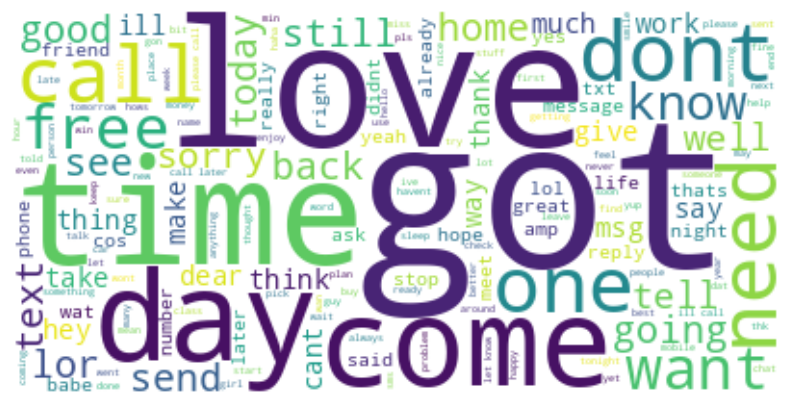

In [82]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the text in the description column
text = " ".join(desc for desc in df.Independent)

# Create wordcloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()